# **Challenge Project 02 - Warm Up: Machine Learning with a Heart**

*29 de março, 2020*

## **1. Descrição geral do problema**

---

![Heart](https://cdn-images-1.medium.com/max/1000/1*6WGnPZ5lkiT2QgK-JP1DFw.png)

As doenças cardíacas são a [principal causa de morte no mundo](https://www.world-heart-federation.org/resources/cardiovascular-diseases-cvds-global-facts-figures/). Para aprender a prevenir doenças cardíacas, precisamos primeiro aprender a detectá-las com segurança.

Nosso conjunto de dados é de um estudo de doenças cardíacas que está aberto ao público há muitos anos. O estudo coleta várias medidas sobre a saúde do paciente e as estatísticas cardiovasculares e, é claro, torna as identidades dos pacientes anônimas.

Os dados são fornecidos como cortesia do [Cleveland Heart Disease Database](http://archive.ics.uci.edu/ml/datasets/statlog+(heart)) através do repositório UCI Machine Learning.

Prevenir doenças cardíacas é importante. Bons sistemas orientados a dados para prever doenças cardíacas podem melhorar todo o processo de pesquisa e prevenção, garantindo que mais pessoas possam ter uma vida saudável.

Nos Estados Unidos, os Centros de Controle e Prevenção de Doenças são um bom recurso para obter informações sobre doenças cardíacas. De acordo com [o site](https://www.cdc.gov/heartdisease/facts.htm):

* Cerca de 610.000 pessoas morrem de doenças cardíacas nos Estados Unidos a cada ano - isso é 1 em cada 4 mortes.
* As doenças cardíacas são a principal causa de morte para homens e mulheres. Mais da metade das mortes por doenças cardíacas em 2009 ocorreram em homens.
* A doença cardíaca coronária (DCC) é o tipo mais comum de doença cardíaca, matando mais de 370.000 pessoas anualmente.
* Todos os anos, cerca de 735.000 americanos sofrem um ataque cardíaco. Destes, 525.000 são um primeiro ataque cardíaco e 210.000 ocorrem em pessoas que já tiveram um ataque cardíaco.
* As doenças cardíacas são a principal causa de morte para pessoas da maioria das etnias dos Estados Unidos, incluindo afro-americanos, hispânicos e brancos. Para índios americanos ou nativos do Alasca e asiáticos ou ilhéus do Pacífico, as doenças cardíacas perdem apenas para o câncer.

Para obter mais informações, consulte o site dos [centros de controle e prevenção de doenças](https://www.cdc.gov/heartdisease/prevention.htm).


**Objetivo:**  prever a classe ***binária heart_disease_present***, que representa se um paciente tem ou não uma doença cardíaca utilizando para a avaliação de desempenho dos modelos preditivos a serem criados a métrica [Logloss](https://en.wikipedia.org/wiki/Loss_functions_for_classification#Cross_entropy_loss_(Log_Loss)).

---

## **2. Carregando Dados**

### **2.1 Importando bibliotecas necessárias**

Vamos começar nosso projeto importanto todas as bilbiotecas necessárias para a realização das fases iniciais de exploração e transformação dos dados (*Data Munging*).

In [ ]:
# Definindo a oculatação de warnings.

options(warn = -1)

# Caso não possua uma das bibliotecas importadas abaixo, a instale com o comando a seguir:

install.packages(c(
    'dplyr',
    'corrplot',
    'ggplot2',
    'gmodels',
    'vcd',
    'pROC',
    'e1071'
))

In [125]:
# Importando bibliotecas.

library(dplyr)
library(corrplot)
library(ggplot2)
library(gmodels)
library(vcd)
library(pROC)
library(e1071)

### **2.2 Carregando dados**

In [126]:
# Importando os dados do dataset.

dataset <- read.table("content/datasets/heart.dat")

# Visualizando dados Importados. 

head(dataset)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
65,1,4,120,177,0,0,140,0,0.4,1,0,7,1


In [127]:
# Renomeando colunas do dataset.

names(dataset) <- c('age', 'sex', 
                  'chest_pain_type', 
                  'resting_blood_pressure', 
                  'serum_cholestoral', 
                  'fasting_blood_sugar',
                  'resting_electro_results',
                  'max_heart_rate_achieved',
                  'exercise_induced_angina',
                  'oldpeak',
                  'slope_of_the_peak',
                  'number_of_major_vessels',
                  'thal',
                  'heart_disease')

In [221]:
# Criando uma cópia do dataset.

data <- dataset

## **3. Data Munging I - Preparando dados para a análise exploratória**

### **3.1 Visão geral dos dados**

Segundo as documentações do [DrivenData](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/108/) e da [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/statlog+(heart)) referente ao projeto, cada linha dos dados contém um registro, com as seguintes variáveis:

| Variável                                 | Tipo         | Descrição                                                                            |
|:-----------------------------------------|:-------------|:-------------------------------------------------------------------------------------|
| **heart_disease (Target)**               | *binário*    | representa se um paciente tem ou não uma doença cardíaca (**0**: apresenta doença cardíaca, **1**: não apresenta doença cardíaca);                                                                                                                  |
| **slope_of_peak**                        | *int*        | é a inclinação do [segmento ST](https://en.wikipedia.org/wiki/ST_segment) do pico do exercício, uma eletrocardiografia lida indicando a qualidade do fluxo sanguíneo no coração;                                                                     |
| **thal**                                 | *categórico* | são os resultados do [teste de stress com tálio](https://www.ucsfbenioffchildrens.org/tests/007201.html) para o fluxo sanguíneo de medição para o coração, com os valores possíveis: ***normal***, ***fixed_defect***, ***reversible_defect***;     |
| **resting_blood_pressure**               | *int*        | é a pressão arterial em repouso;                                                     |
| **chest_pain_type**                      | *int*        | é o tipo de dor no peito (1-4);                                                      |
| **number_major_vessels**                 | *int*        | é o número de vasos principais (0-3) coloridos por *flourosopy*;                     |
| **fasting_blood_sugar**                  | *binário*    | indica se o açúcar no sangue em jejum é > 120 *mg/dl*;                               |
| **resting_electro_results**              | *int*        | são os resultados eletrocardiográficos em repouso (0-2);                             |
| **serum_cholesterol**                    | *int*        | é o colestorol sérico em *mg/dl*;                                                    |
| **oldpeak**                              | *float*      | oldpeak = [depressão do ST](https://en.wikipedia.org/wiki/ST_depression) induzida pelo exercício em relação ao repouso, é uma medida de anormalidade nos eletrocardiogramas;                                                                         |
| **sex**                                  | *binário*    | indica o sexo do paciente (**0**: feminino, **1**: masculino);                       |
| **age**                                  | *int*        | indica a idade em anos do paciente;                                                  |
| **max_heart_rate_achieved**              | *int*        | é a frequência cardíaca máxima atingida (batimentos por minuto) e;                   |
| **exercise_induced_angina**              | *binário*    | indica se há dor no peito induzida por exercícios ( **0**: falso, **1**: verdadeiro).|

Nesta etapa vamos buscar organizar os dados das variáveis para efetuar a análise exploratória e extrair insigths que possam auxiliar no processo de criação dos modelos preditivos. 

In [129]:
# Verificando os tipos das colunas carregadas no dataset.

glimpse(data)

Observations: 270
Variables: 14
$ age                     <dbl> 70, 67, 57, 64, 74, 65, 56, 59, 60, 63, 59,...
$ sex                     <dbl> 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0...
$ chest_pain_type         <dbl> 4, 3, 2, 4, 2, 4, 3, 4, 4, 4, 4, 4, 3, 1, 4...
$ resting_blood_pressure  <dbl> 130, 115, 124, 128, 120, 120, 130, 110, 140...
$ serum_cholestoral       <dbl> 322, 564, 261, 263, 269, 177, 256, 239, 293...
$ fasting_blood_sugar     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0...
$ resting_electro_results <dbl> 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2...
$ max_heart_rate_achieved <dbl> 109, 160, 141, 105, 121, 140, 142, 142, 170...
$ exercise_induced_angina <dbl> 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0...
$ oldpeak                 <dbl> 2.4, 1.6, 0.3, 0.2, 0.2, 0.4, 0.6, 1.2, 1.2...
$ slope_of_the_peak       <dbl> 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1...
$ number_of_major_vessels <dbl> 3, 0, 0, 1, 1, 0, 1, 1, 2, 3, 0, 0, 0, 2, 1...
$ thal              

Verificamos a existência de **14 variáveis** numéricas e **270 observações** dentro do dataset.

In [130]:
# Verificando a existência de valores NA no dataset.

print(sapply(data, function(v) {
    anyNA(v)
}))

                    age                     sex         chest_pain_type 
                  FALSE                   FALSE                   FALSE 
 resting_blood_pressure       serum_cholestoral     fasting_blood_sugar 
                  FALSE                   FALSE                   FALSE 
resting_electro_results max_heart_rate_achieved exercise_induced_angina 
                  FALSE                   FALSE                   FALSE 
                oldpeak       slope_of_the_peak number_of_major_vessels 
                  FALSE                   FALSE                   FALSE 
                   thal           heart_disease 
                  FALSE                   FALSE 


Não foi detectado nenhum valor *NA* dentro do conjunto de dados.

In [131]:
# Verificando o número de valores únicos presentes em cada uma das variáveis especificadas.

print(sapply(data, function(v) {
    length(unique(v))
}))

                    age                     sex         chest_pain_type 
                     41                       2                       4 
 resting_blood_pressure       serum_cholestoral     fasting_blood_sugar 
                     47                     144                       2 
resting_electro_results max_heart_rate_achieved exercise_induced_angina 
                      3                      90                       2 
                oldpeak       slope_of_the_peak number_of_major_vessels 
                     39                       3                       4 
                   thal           heart_disease 
                      3                       2 


### **3.2 Analisando a correlação entre as variáveis**

Nesta etapa desejamos verificar como as variáveis se correlacionam, ou seja, o quanto uma caraterística ajuda a explicar a variação de outra característica.

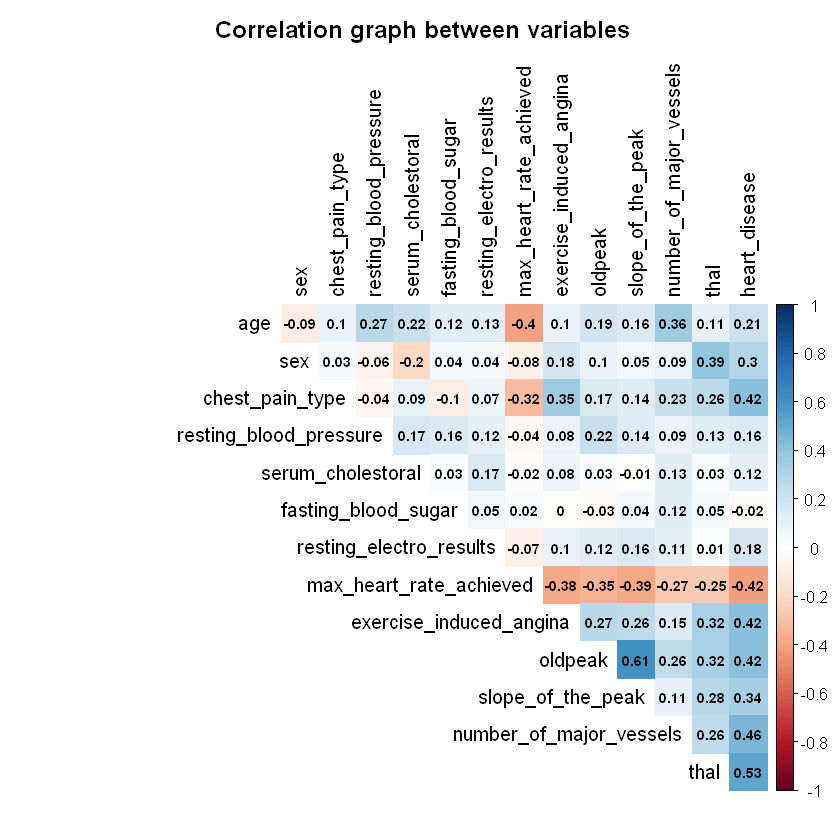

In [225]:
# Calculando a matriz de correlação.

corr <- cor(data)

# Criando gráfico para avaliar a correlação entre as variáveis.

corrplot(
    corr        = corr, 
    type        = 'upper', 
    addCoef.col = "black", 
    diag        = F, 
    number.cex  = 0.7,
    tl.col      = 'black', 
    method      = 'color',
    main        = "\n\n Correlation graph between variables" 
)

### **3.3 Alterando tipos de dados das variáveis**

A partir da documentação fornecida sobre o conjunto de dados, iremos alterar o tipo de dado de cada variável.

In [133]:
## Alterando o tipo da variável sex.

data$sex <- as.factor(data$sex)

# Alterando as etiquetas dos valores da variável.

levels(data$sex) <- c('F', 'M')

## Alterando o tipo da variável fasting_blood_sugar.

data$fasting_blood_sugar <- as.factor(data$fasting_blood_sugar)

# Alterando as etiquetas dos valores da variável.

levels(data$fasting_blood_sugar) <- c('No', 'Yes')

## Alterando o tipo da variável exercise_induced_angina.

data$exercise_induced_angina <- as.factor(data$exercise_induced_angina)

# Alterando as etiquetas dos valores da variável.

levels(data$exercise_induced_angina) <- c('No', 'Yes')

# Alterando o tipo da variável resting_electro_results.

data$resting_electro_results <- as.factor(data$resting_electro_results)

# Alterando o tipo da variável chest_pain_type.

data$chest_pain_type <- as.factor(data$chest_pain_type)

# Alterando o tipo da variável slope_of_the_peak.

data$slope_of_the_peak <- factor(data$slope_of_the_peak, ordered = T)

## Alterando o tipo da variável thal.

data$thal <- as.factor(data$thal)

# Alterando as etiquetas dos valores da variável.

levels(data$thal) <- c('Normal', 'Fixed defect', 'Reversable defect')

## Alterando o tipo da variável heart_disease.

data$heart_disease <- as.factor(data$heart_disease)

# Alterando as etiquetas dos valores da variável.

levels(data$heart_disease) <- c('No', 'Yes')

# Alterando o tipo da variável age.

data$age <- as.integer(data$age)

# Alterando o tipo da variável resting_blood_pressure.

data$resting_blood_pressure <- as.integer(data$resting_blood_pressure)

# Alterando o tipo da variável serum_cholestoral.

data$serum_cholestoral <- as.integer(data$serum_cholestoral)

# Alterando o tipo da variável max_heart_rate_achieved.

data$max_heart_rate_achieved <- as.integer(data$max_heart_rate_achieved)

# Alterando o tipo da variável number_of_major_vessels.

data$number_of_major_vessels <- as.factor(data$number_of_major_vessels)

In [134]:
# Verificando os tipos das colunas carregadas no dataset.

glimpse(data)

Observations: 270
Variables: 14
$ age                     <int> 70, 67, 57, 64, 74, 65, 56, 59, 60, 63, 59,...
$ sex                     <fct> M, F, M, M, F, M, M, M, M, F, M, M, M, M, F...
$ chest_pain_type         <fct> 4, 3, 2, 4, 2, 4, 3, 4, 4, 4, 4, 4, 3, 1, 4...
$ resting_blood_pressure  <int> 130, 115, 124, 128, 120, 120, 130, 110, 140...
$ serum_cholestoral       <int> 322, 564, 261, 263, 269, 177, 256, 239, 293...
$ fasting_blood_sugar     <fct> No, No, No, No, No, No, Yes, No, No, No, No...
$ resting_electro_results <fct> 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2...
$ max_heart_rate_achieved <int> 109, 160, 141, 105, 121, 140, 142, 142, 170...
$ exercise_induced_angina <fct> No, No, No, Yes, Yes, No, Yes, Yes, No, No,...
$ oldpeak                 <dbl> 2.4, 1.6, 0.3, 0.2, 0.2, 0.4, 0.6, 1.2, 1.2...
$ slope_of_the_peak       <ord> 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1...
$ number_of_major_vessels <fct> 3, 0, 0, 1, 1, 0, 1, 1, 2, 3, 0, 0, 0, 2, 1...
$ thal              

Perfeito, agora podemos ir para as próxima etapas de exploração dos dados.

### **3.4 Explorando a distribuição de cada variável individualmente**

Antes de começarmos, queremos deixar claro que quando utilizarmos expressões que descrevam uma pessoa como sendo **saudável** ou **sadia** estaremos especificamente declarando que ela não possui registros de doenças cardiovasculares. 

Independente do indivíduo apresentar ou não outras doenças, adotaremos esta nomeclatura para aumentar a fluidez na escrita da nossa análise que tem como foco estudar problemas cardíacos. 

#### **3.4.1 Criando funções auxiliares**

##### **3.4.1.1 Funções para a criação de gráficos**

Criaremos algumas funções para padronizar as plotagens de gráficos que efetuaremos.

In [135]:
# Definindo um função para criar gráficos de barras.

barPlot <- function(col, data, target = 'heart_disease') {
    
    ggplot(data = data, aes(x = data[, col], fill = data[, target])) + 
        geom_bar(alpha = 0.85, position = 'dodge') +
        ggtitle(paste("Bar chart for variable:", col)) +
        xlab(col) +
        labs(fill = "Heart Disease") +
        theme_bw()
}

In [136]:
# Definindo um função para criar gráficos de densidade.

densityPlot <- function(col, data, target = 'heart_disease') {
    
    ggplot(data = data, aes(x = data[, col], fill = data[, target])) + 
        geom_density(alpha = 0.85) +
        ggtitle(paste("Density chart for variable:", col)) +
        xlab(col) +
        labs(fill = "Heart Disease") +
        theme_bw() 
}

In [137]:
# Definindo um função para criar gráficos de boxplot.

boxPlot <- function(col, data, target = 'heart_disease') {
  
    ggplot(data = data, aes(x = data[, target],  y = data[, col], fill = data[, target])) + 
        geom_boxplot(alpha = 0.85) +
        ggtitle(paste("Boxplot for variable:", col)) +
        ylab(col) +
        xlab("") + 
        labs(fill = "Heart Disease") +
        theme_bw()  
}

##### **3.4.1.2 Funções para calcular estatísticas**

Criaremos uma função para padronizar as estatísticas que calcularemos para cada uma das variáveis a serem estudadas.

In [138]:
# Definindo um função para gerar um dataframe com as estatísticas de uma variável do dataset.

varStats <- function(col, data, target = 'heart_disease') {

    if(!is.factor(data[, col])) {                 

        # Calcula estatísticas de variáveis numéricas.
        
        data %>%
            group_by_at(target) %>%
            summarize(
                Min       = min(get(col)),
                Q1        = unname(quantile(get(col), probs = c(0.25))),
                Median    = median(get(col)),
                mean      = mean(get(col)),
                Q3        = unname(quantile(get(col), probs = c(0.75))),
                Max       = max(get(col)),
                Sd        = sd(get(col)),
                Sk        = skewness(get(col)),
                Ck        = kurtosis(get(col))
            )

    } else {                                      

        # Calcula estatísticas de variáveis categóricas.

        l = list()

        # Contabiliza o número de registros dentro de cada classe da variável.

        l$variableClasses <- data %>%
            group_by_at(col) %>%
            summarise(
                count = n(),
                prop  = n() / nrow(data) * 100
            )
        
        # Contabiliza o número de registros dentro de cada classe da variável e segmenta cada subconjunto a partir da variável alvo.

        l$variableClassesGroupedByTargetVariable <- data %>%
            group_by_at(c(col, target)) %>%
            summarise(
                count = n(),
                prop  = n() / nrow(data) * 100
            )

        # Retorna a lista com as estatísticas computadas.

        l
    }
}

O coeficente de **Assimetria (Skewness)** indica como os dados estão *distribuídos* e para interpretar seu resultado podemos olhar a tabela a seguir:

| Índice de Assimetria | Descrição                                                                                                                        |
|:---------------------|:---------------------------------------------------------------------------------------------------------------------------------|
| **SK ≈ 0**           | Os dados são simétricos. Tanto a cauda do lado direito quanto a do lado esquerdo da função densidade de probabilidade são iguais;|
| **SK < 0**           | A assimetria é negativa. A cauda do lado esquerdo da função densidade de probabilidade é maior que a do lado direito e;          |
| **SK > 0**           | A assimetria é positiva. A cauda do lado direito da função densidade de probabilidade é maior que a do lado esquerdo.            |


O coeficiente de **Curtose (Kurtosis)** é uma medida que caracteriza o *achatamento da curva* da função de distribuição e para interpretar seu resultado podemos olhar a tabela a seguir:

| Índice de Curtose | Descrição                                                                                                      |
|:------------------|:---------------------------------------------------------------------------------------------------------------|
| **CK ≈ 0**        | A distribuição é normal e é chamada de Curtose *Mesocúrtica*;                                                  |
| **CK < 0**        | A Cauda é mais leve que a normal. Para um coeficiente de Curtose negativo, tem-se uma Curtose *Platicúrtica* e;|
| **CK > 0**        | A Cauda é mais pesada que a normal. Para um coeficiente de Curtose positivo, tem-se uma Curtose *Leptocúrtica*.|

**Atenção:** Há diferentes fórmulas para calcular estes coeficientes. Mas, para este estudo utilizamos as funções fornecidas pela biblioteca **e1071** com suas respectivas configurações padrão. Em caso de dúvida, consulte a [documentação](https://cran.r-project.org/web/packages/e1071/e1071.pdf).

#### **3.4.2 Variável age**

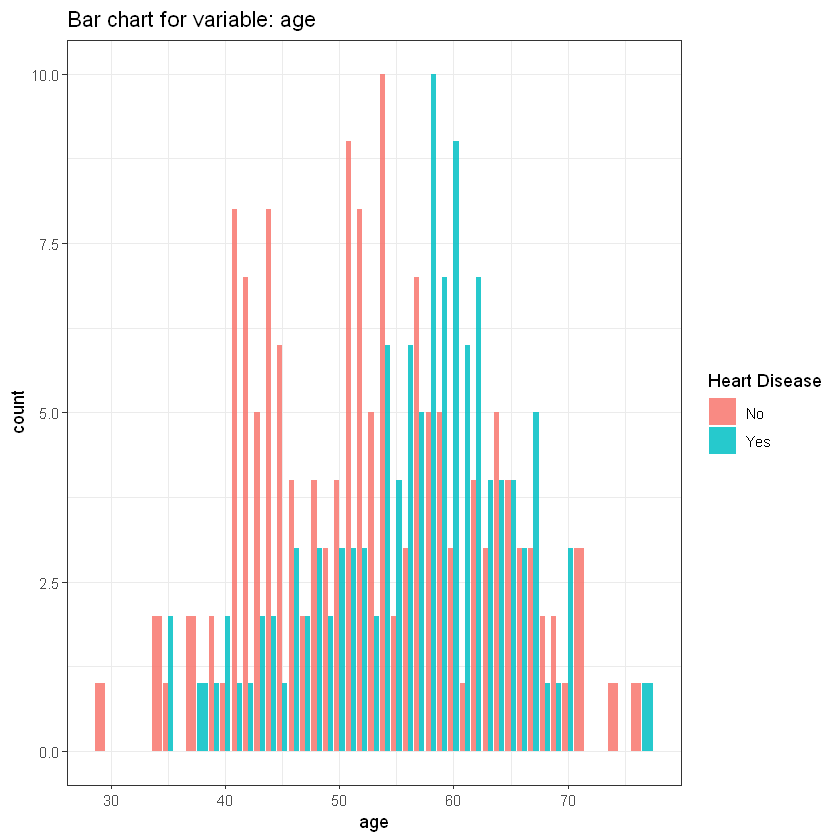

In [139]:
# Definindo o nome da variável a ser analisada.

col <- 'age'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

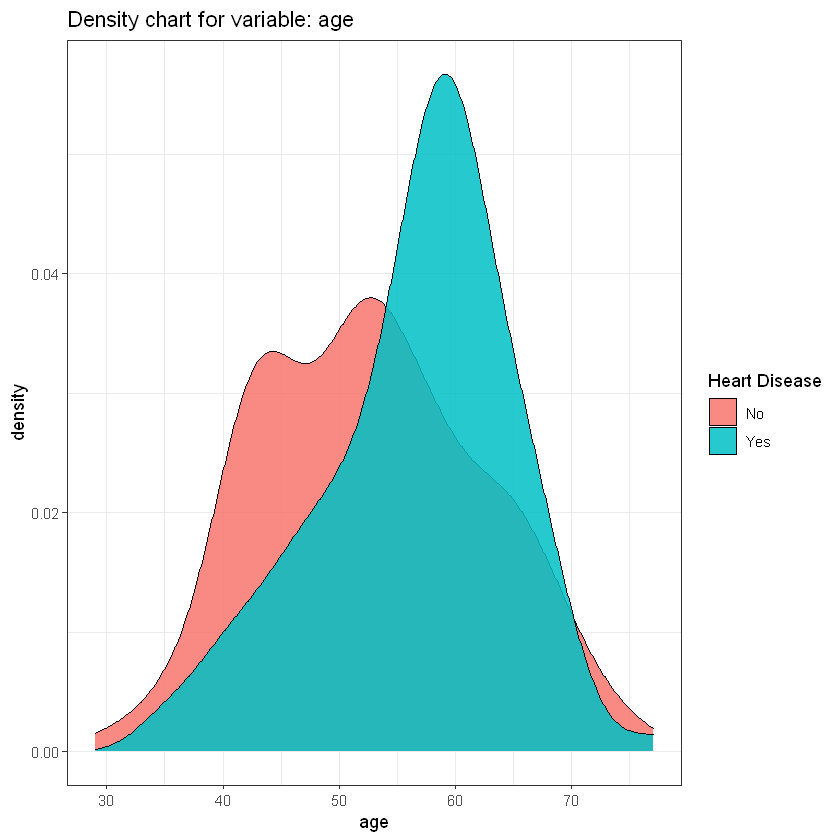

In [140]:
# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data)

Os dados dos indivíduos que apresentam problemas cardíacos está mais deslocado para a direita quando comparado ao dos indivíduos que não apresentam estas dificuldades. Isto nos indica que as pessoas com problemas cardiovasculares tendem a ser mais velhas do que aquelas que apresentam um coração sadio.

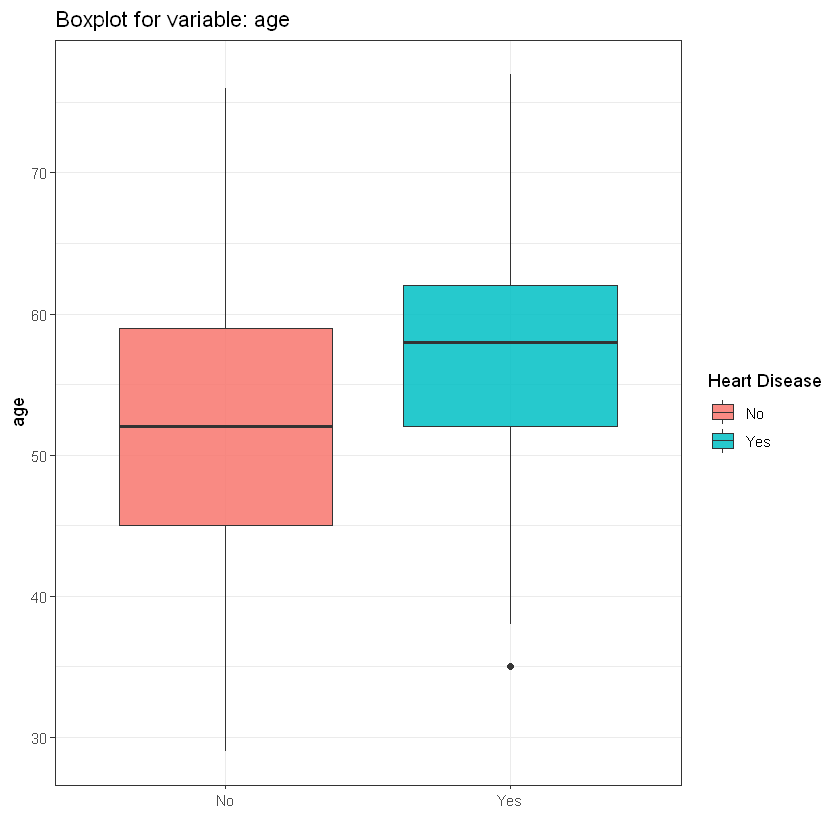

In [141]:
# Criando um gráfico de boxplot para a variável especificada.

boxPlot(col, data)

O gráfico de boxplot nos permite detectar a presença de outliers dentro dos dados dos indivíduos que apresentam problemas cardíacos.

In [142]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data)

heart_disease,Min,Q1,Median,mean,Q3,Max,Sd,Sk,Ck
No,29,45,52,52.70667,59,76,9.509830,0.1532323,-0.63383151
Yes,35,52,58,56.59167,62,77,8.116273,-0.5327168,0.01991217


Concluímos que há uma diferença mediana de **6 anos** entre os índividuos classificados com ou sem problemas cardíacos.

#### **3.4.3 Variável sex**

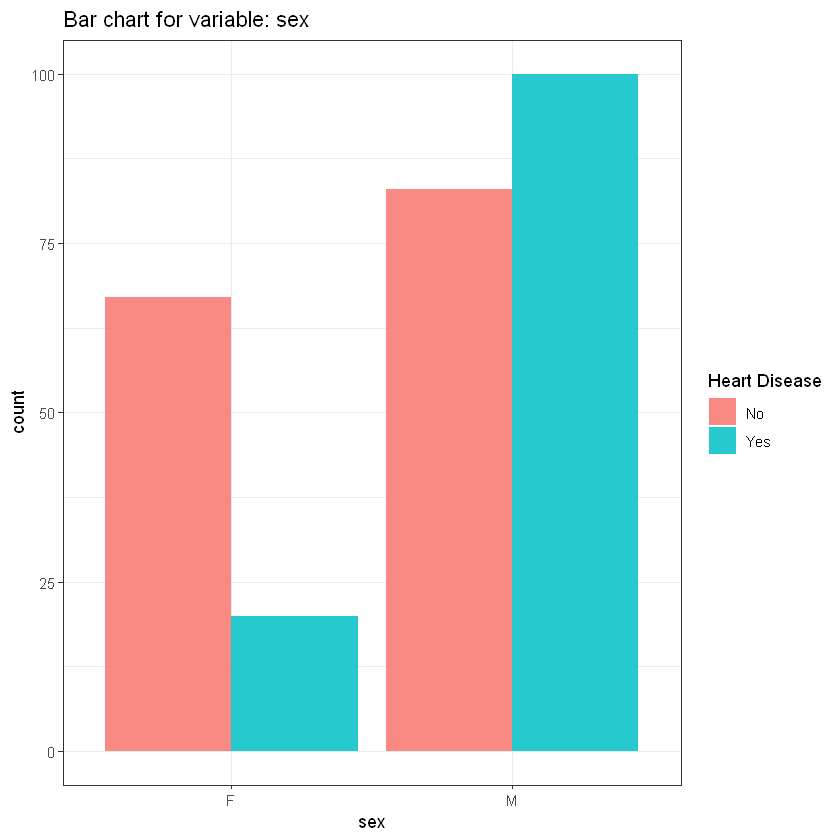

In [143]:
# Definindo o nome da variável a ser analisada.

col <- 'sex'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

In [144]:
# Calculando algumas estatísticas para a variável especificada.

stats <- varStats(col, data)

# Verificando a distribuição de registros entre as classes da variável.

stats$variableClasses

sex,count,prop
F,87,32.22222
M,183,67.77778


Observamos que dentro do nosso conjunto de dados aproximadamente **32.2%** dos registros estão associados a mulheres e **67.8%** estão associados a homens.

In [145]:
# Verificando a distribuição de registros entre as classes da variável especificada agrupadas pela variável alvo.

stats$variableClassesGroupedByTargetVariable

sex,heart_disease,count,prop
F,No,67,24.814815
F,Yes,20,7.407407
M,No,83,30.740741
M,Yes,100,37.037037


In [226]:
37.037037 / 7.407407

[1] 5

É interessante observar que a proporção de mulheres com problemas cardíacos dentro do conjunto de dados é aproximadamente **3.34 vezes menor** do que aquelas que estão saudáveis e **5 vezes menor** do que a proporção de homens doentes.

#### **3.4.4 Variável chest_pain_type**

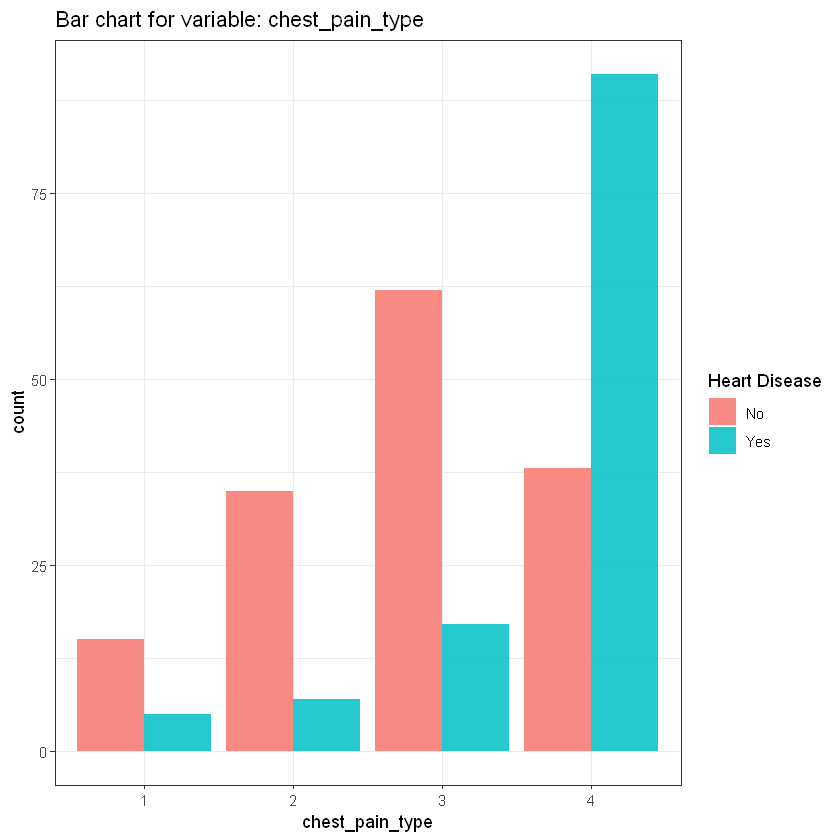

In [146]:
# Definindo o nome da variável a ser analisada.

col <- 'chest_pain_type'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

Vemos que as pessoas que apresentam dores do tipo **1, 2 e 3** são predominantemente sadias, mas este padrão se inverte para a dor tipo **4** onde a maior parte dos indivíduos que a possuem apresentam problemas cardíacos. 

In [147]:
# Calculando algumas estatísticas para a variável especificada.

stats <- varStats(col, data)

# Verificando a distribuição de registros entre as classes da variável.

stats$variableClasses

chest_pain_type,count,prop
1,20,7.407407
2,42,15.555556
3,79,29.259259
4,129,47.777778


Observamos que as proporções dos registros do tipo de dor crescem de maneira incremental, sendo a dor do *tipo 1* a **menos frequente (presente em aproximadamente 7.4% dos registros)** e a do *tipo 4* a **mais frequente (presente em aproximadamente 47.8% dos registros**).

In [148]:
# Verificando a distribuição de registros entre as classes da variável especificada agrupadas pela variável alvo.

stats$variableClassesGroupedByTargetVariable

chest_pain_type,heart_disease,count,prop
1,No,15,5.555556
1,Yes,5,1.851852
2,No,35,12.962963
2,Yes,7,2.592593
3,No,62,22.962963
3,Yes,17,6.296296
4,No,38,14.074074
4,Yes,91,33.703704


Destacamos que **78.5%** dos indivíduos que apresentam a dor do *tipo 3* tem um coração saudável enquanto **70.5%** dos indivíduos  que aprentam a dor do *tipo 4* possuem problemas cardíacos.

#### **3.4.5 Variável resting_blood_pressure**

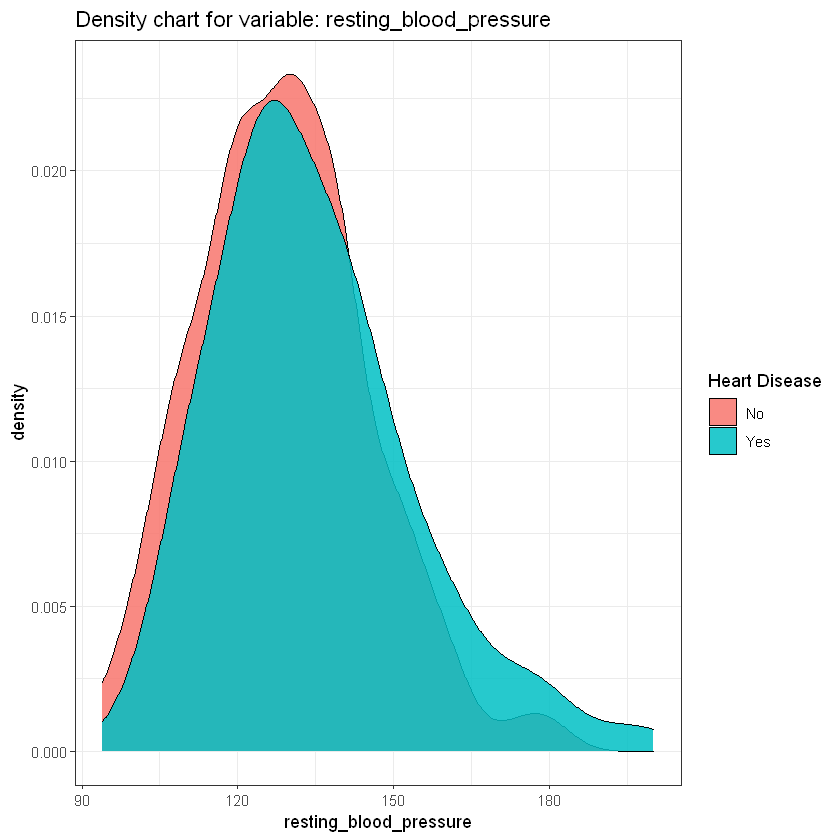

In [149]:
# Definindo o nome da variável a ser analisada.

col <- 'resting_blood_pressure'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data)

Bom, parece que a pressão arterial de todos os indivíudos em repouso apresenta um valor mediano muito próximo independente da existência de problemas cardiovasculares.

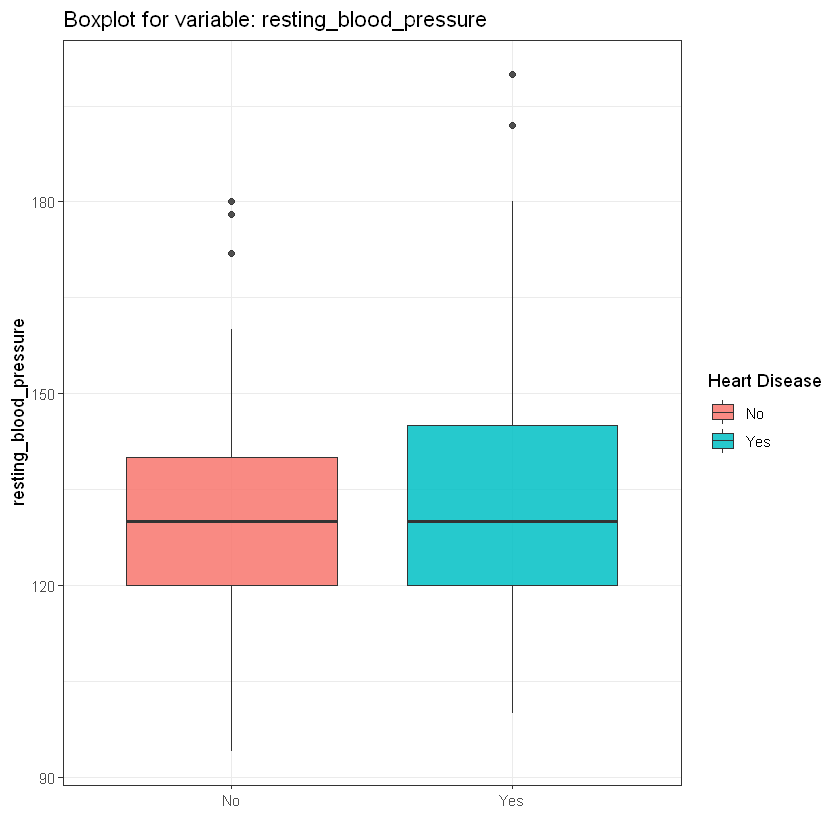

In [150]:
# Criando um gráfico de boxplot para a variável especificada.

boxPlot(col, data)

O boxplot nos confirma que o valor mediano destes conjuntos de dados está muito próximo; nos permite detectar a exitência de outliers e ainda observar a significativa assimetria à direita dos dados dos indivíduos que apresentam doenças cardíacas.

In [151]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data)

heart_disease,Min,Q1,Median,mean,Q3,Max,Sd,Sk,Ck
No,94,120,130,128.8667,140,180,16.45766,0.4052933,0.1702971
Yes,100,120,130,134.4417,145,200,19.09542,0.8665313,0.8092740


Veja só! O valor médiano para a pressão arterial dos indivíudos em repouso é o mesmo independente de estarem ou não doentes.

Note que o coeficiente de assimetria (**Sk**) também comprova nossa teoria de que a distribuição dos indivíduos com problemas cardíacos apresenta uma assimetria à direita.





#### **3.4.6 Variável serum_cholestoral**

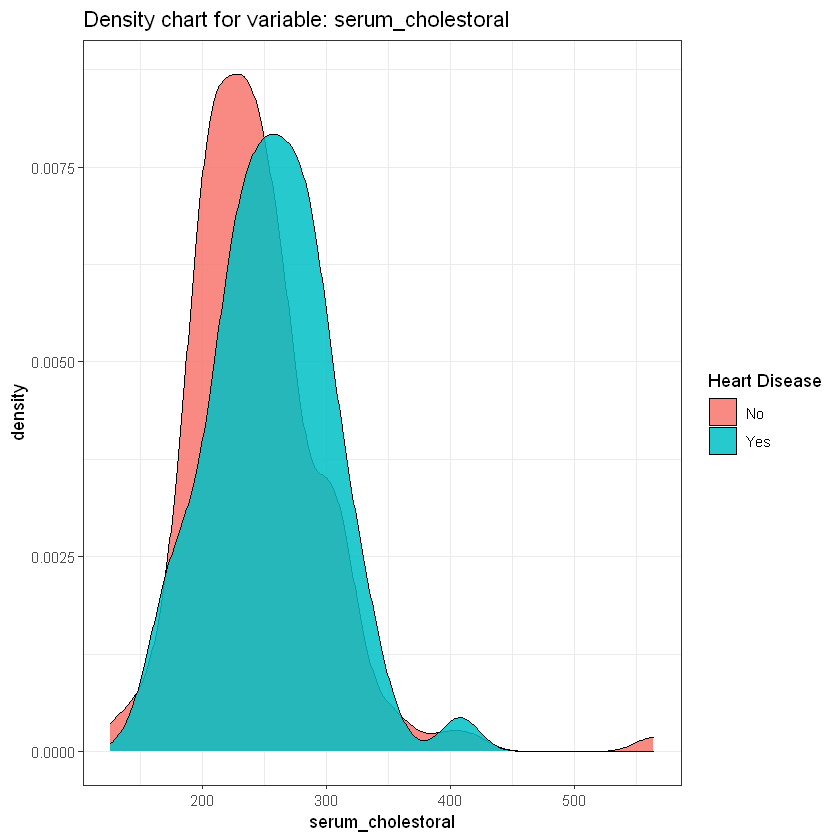

In [152]:
# Definindo o nome da variável a ser analisada.

col <- 'serum_cholestoral'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data)

O gráfico de densidade está indicando que há uma diferença no valor mediano do colestorol sérico em *mg/dl* entre os individuos classificados com ou sem doenças cardíacas.

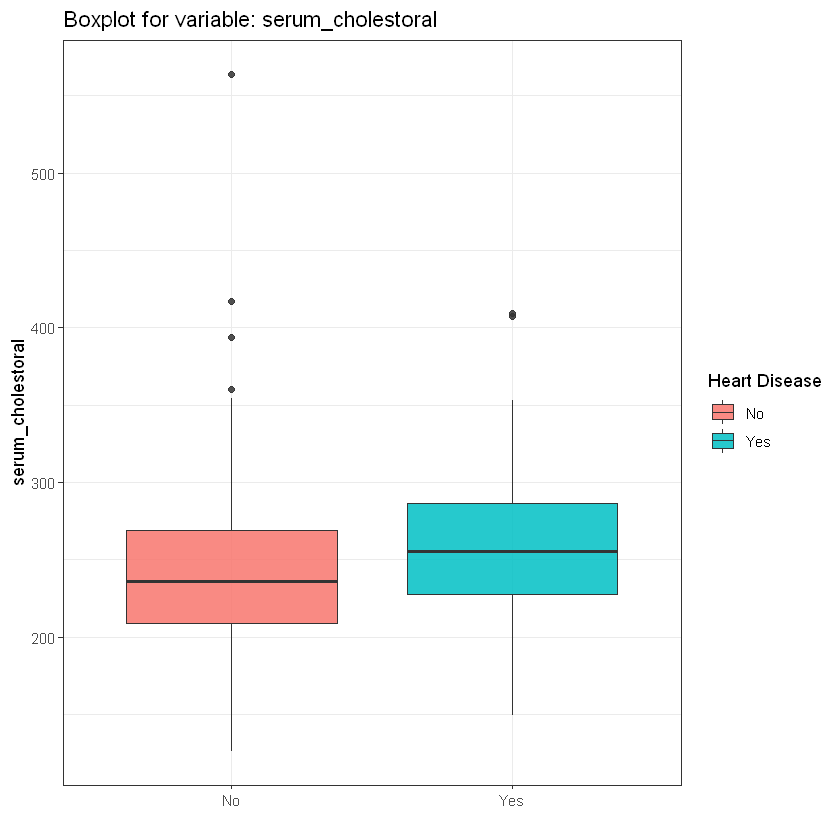

In [153]:
# Criando um gráfico de boxplot para a variável especificada.

boxPlot(col, data)

In [154]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data)

heart_disease,Min,Q1,Median,mean,Q3,Max,Sd,Sk,Ck
No,126,209.00,236.0,244.2133,268.75,564,54.01909,1.7472631,7.4636429
Yes,149,227.25,255.5,256.4667,286.50,409,47.96917,0.2888262,0.4057267


Concluímos que a diferença mediana entre as classes é de **19.5** *mg/dl*.

#### **3.4.7 Variável fasting_blood_sugar**

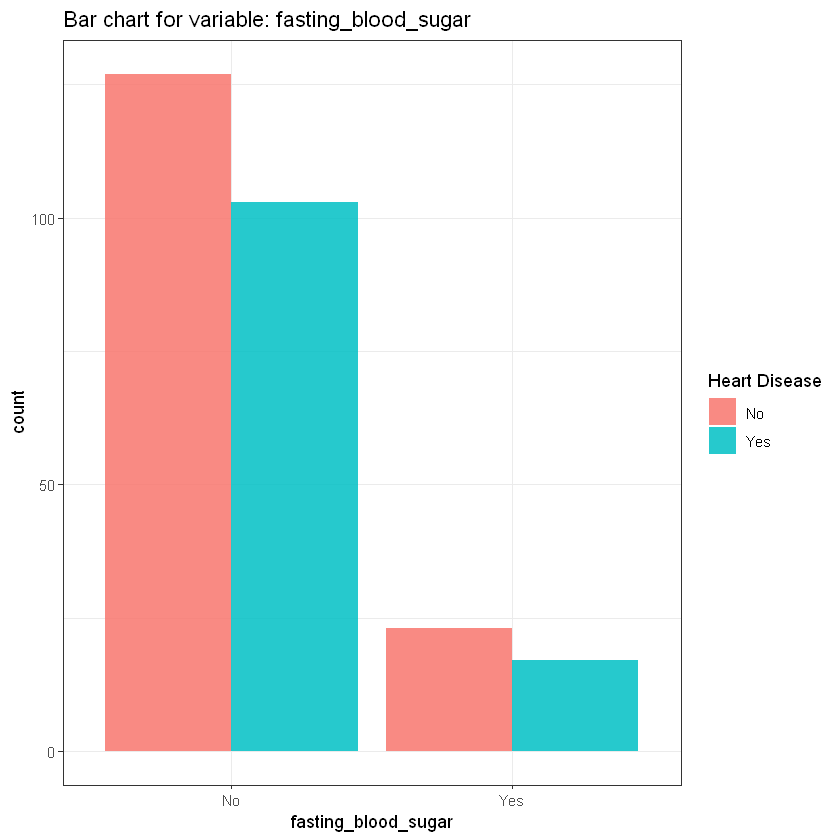

In [155]:
# Definindo o nome da variável a ser analisada.

col <- 'fasting_blood_sugar'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

Interessante! A maior parte dos indivíduos registrados não possuem uma taxa de açúcar no sangue em jejum maior do que 120 *mg/dl*.

In [156]:
# Calculando algumas estatísticas para a variável especificada.

stats <- varStats(col, data)

# Verificando a distribuição de registros entre as classes da variável.

stats$variableClasses

fasting_blood_sugar,count,prop
No,230,85.18519
Yes,40,14.81481


Aproximadamente **14.8%** dos indivíduos registrados apresentam uma taxa de açúcar no sangue em jejum **maior** do que 120 *mg/dl*.

In [157]:
# Verificando a distribuição de registros entre as classes da variável especificada agrupadas pela variável alvo.

stats$variableClassesGroupedByTargetVariable

fasting_blood_sugar,heart_disease,count,prop
No,No,127,47.037037
No,Yes,103,38.148148
Yes,No,23,8.518519
Yes,Yes,17,6.296296


Está tabela nos informa a proporção de registros em cada uma das classes da variável que avalia a taxa de açúcar no sangue agrupadas em subgrupos que indicam se o índividuo possui ou não problemas cardíacos. Mas, para este caso as informações fornecidas não nos ajudam a extrair muitas informações interessantes.

Por isso, vamos criar outra tabela em que dividimos a coluna **count** pelo número total de registros classificados em cada grupo da variável **fasting_blood_sugar** e recalcularemos as proporções. De maneira simples, o que estamos querendo é determinar se a proporção de indivíduos com problemas cardíacos varia muito entre a classe de indivíduos que apresentam ou não uma taxa de açúcar no sangue em jejum *maior* do que 120 *mg/dl*.

In [158]:
# Calculando as proporções de indivíduos com ou sem problemas cardíacos dentro de cada classe da variável especificada.

stats$variableClassesGroupedByTargetVariable %>%
    group_by(fasting_blood_sugar) %>%
    mutate(prop = count / sum(count) * 100)

fasting_blood_sugar,heart_disease,count,prop
No,No,127,55.21739
No,Yes,103,44.78261
Yes,No,23,57.50000
Yes,Yes,17,42.50000


Vemos que as proporções são bem próximas. 

Dentro da classe de indivíduos que **não** possuem uma taxa de açúcar no sangue em jejum maior do que 120 *mg/dl*, aproximadamente **55.2%** tem um coração sadio enquanto **44.8%** possuem doenças.

Dentro da classe de indivíduos que possuem uma taxa de açúcar no sangue em jejum maior do que 120 *mg/dl*, **57.5%** tem um coração sadio enquanto **42.5%** possuem doenças.

#### **3.4.8 Variável resting_electro_results**

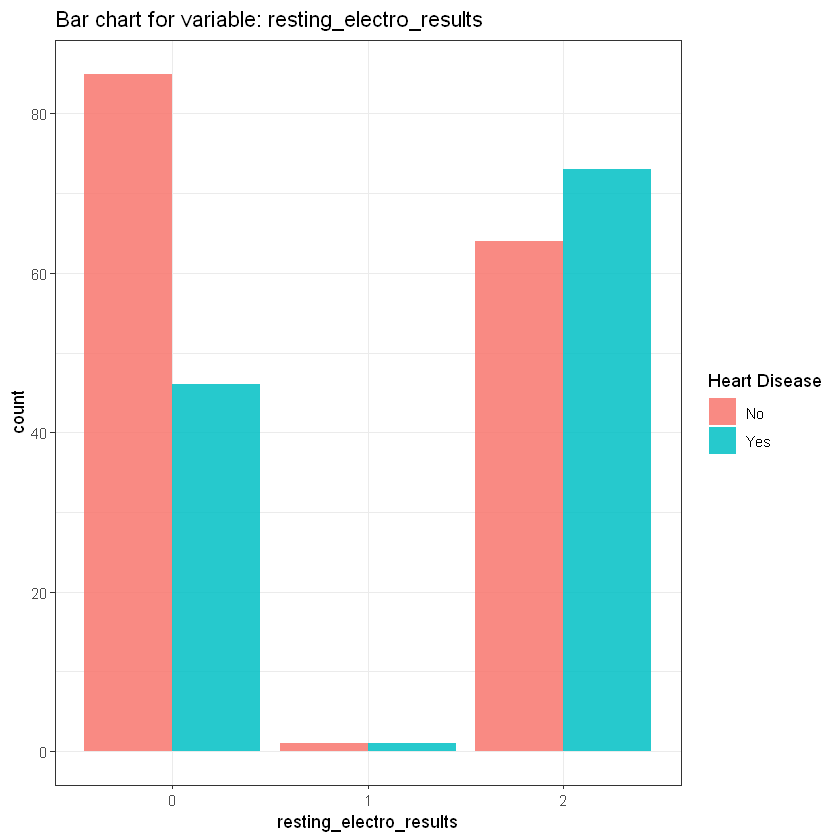

In [159]:
# Definindo o nome da variável a ser analisada.

col <- 'resting_electro_results'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

Os resultados eletrocardiográficos em repouso que apresentam **valor 0** estão predominantemente associados a indivíduos que não possuem doenças enquanto aqueles classificados com o **valor 2** estão predominantemente associados a índivíduos doentes.  

In [160]:
# Calculando algumas estatísticas para a variável especificada.

stats <- varStats(col, data)

# Verificando a distribuição de registros entre as classes da variável.

stats$variableClasses

resting_electro_results,count,prop
0,131,48.5185185
1,2,0.7407407
2,137,50.7407407


Os resultados eletrocardiográficos em repouso que obtiveram o **valor 1** são aqueles que apresentam a menor proporção dentro do conjunto de dados, aproximadamente **0.74%**.

In [161]:
# Verificando a distribuição de registros entre as classes da variável especificada agrupadas pela variável alvo.

stats$variableClassesGroupedByTargetVariable

resting_electro_results,heart_disease,count,prop
0,No,85,31.4814815
0,Yes,46,17.0370370
1,No,1,0.3703704
1,Yes,1,0.3703704
2,No,64,23.7037037
2,Yes,73,27.0370370


Destacamos que dentro dos resultados eletrocardiográficos em repouso classificados com o **valor 0**, a quantidade de indivíduos que são sadios é cerca de **1.85** vezes **maior** do que aqueles que são doentes.  

#### **3.4.9 Variável max_heart_rate_achieved**

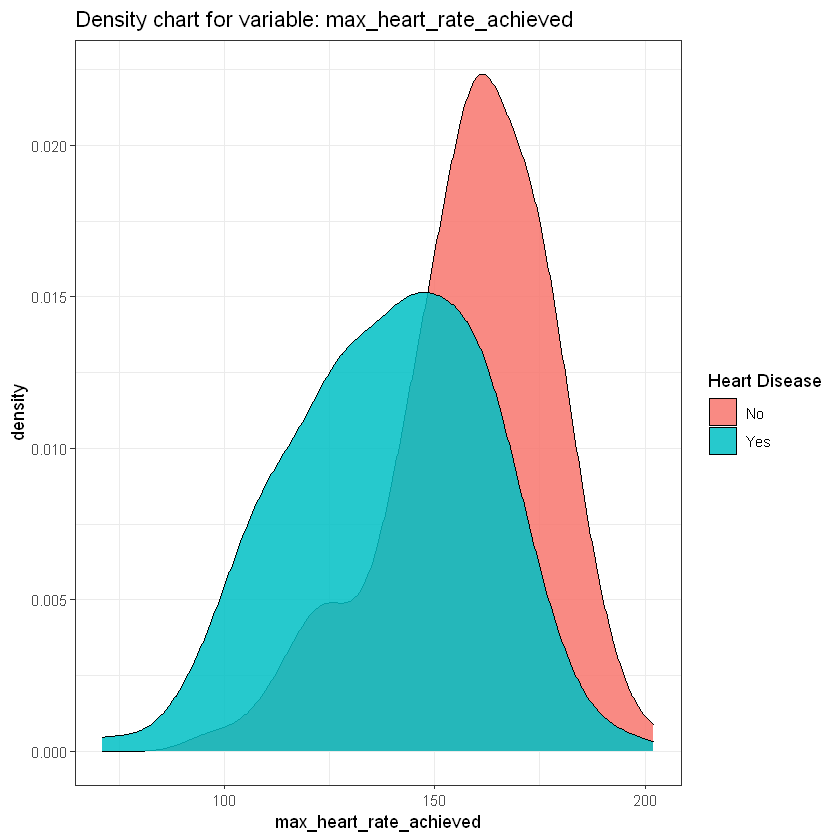

In [162]:
# Definindo o nome da variável a ser analisada.

col <- 'max_heart_rate_achieved'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data)

Parece que o número mediano de batimentos cardíacos por minuto dos indivíduos sádios é maior do que o dos indivíduos com doenças.

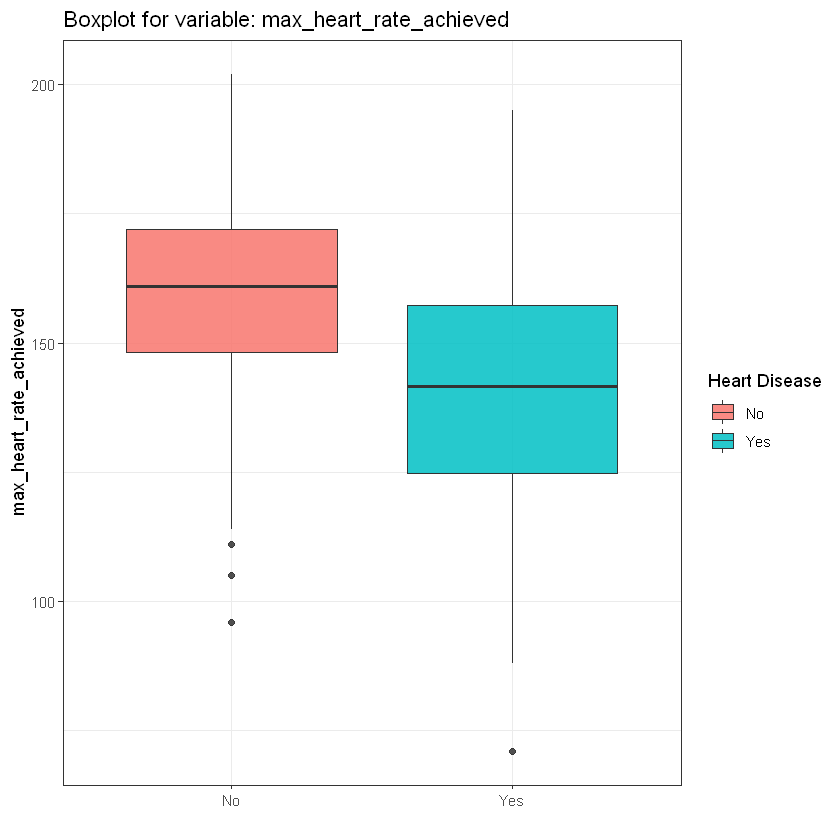

In [163]:
# Criando um gráfico de boxplot para a variável especificada.

boxPlot(col, data)

Detectamos a existência de outliers dentro dos dois subconjuntos analisados.

In [164]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data)

heart_disease,Min,Q1,Median,mean,Q3,Max,Sd,Sk,Ck
No,96,148.25,161.0,158.3333,172.00,202,19.28336,-0.6639215,0.3710206
Yes,71,124.75,141.5,138.8583,157.25,195,23.13072,-0.2390985,-0.3985598


Bom, como suspeitávamos pessoas com doenças cardiovasculares apresentam um número mediano menor de batimentos cardíacos (cerca de **21 batimentos** a menos). Também observamos que o conjunto de dados de índividuos sadios tem um desvio-padrão **menor**.  

#### **3.4.10 Variável exercise_induced_angina**

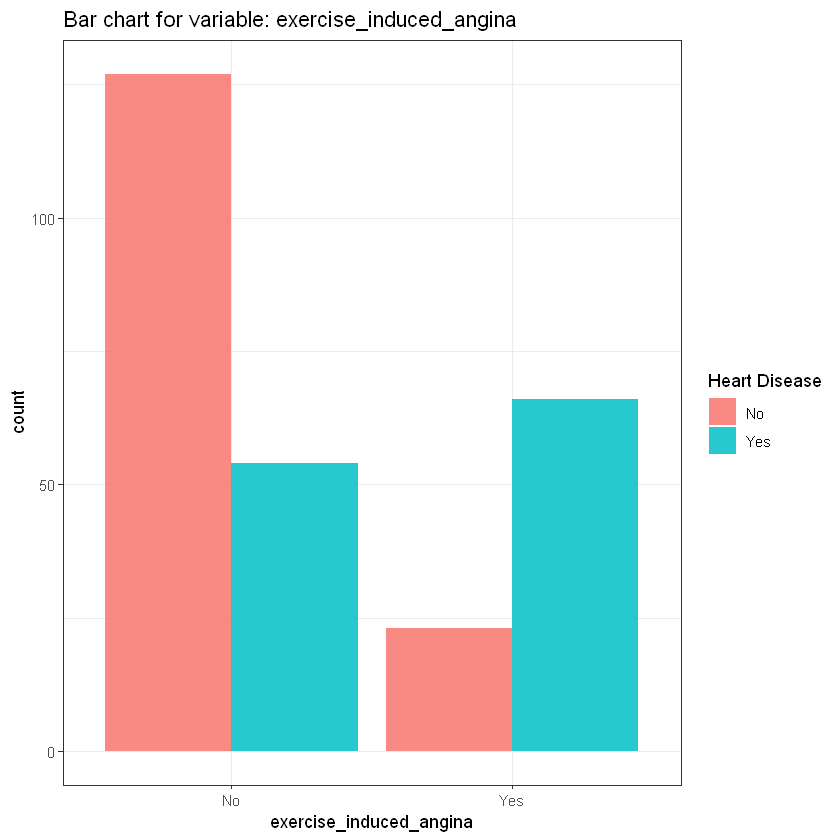

In [165]:
# Definindo o nome da variável a ser analisada.

col <- 'exercise_induced_angina'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

Vemos que predominantemente não há dor no peito induzida por exercício para os indivíduos sadios, enquanto a maior parte dos doentes registraram sentir algo.

In [166]:
# Calculando algumas estatísticas para a variável especificada.

stats <- varStats(col, data)

# Verificando a distribuição de registros entre as classes da variável.

stats$variableClasses

exercise_induced_angina,count,prop
No,181,67.03704
Yes,89,32.96296


Observamos que em aproximadamente **67%** dos registros os indivíduos não sentiram dor no peito.

In [167]:
# Verificando a distribuição de registros entre as classes da variável especificada agrupadas pela variável alvo.

stats$variableClassesGroupedByTargetVariable

exercise_induced_angina,heart_disease,count,prop
No,No,127,47.037037
No,Yes,54,20.000000
Yes,No,23,8.518519
Yes,Yes,66,24.444444


Por fim, verificamos que cerca de **24.4%** dos indivíduos apresenta dor no peito induzida por execícios e efetivamente possui doenças cardíacas.

#### **3.4.11 Variável oldpeak**

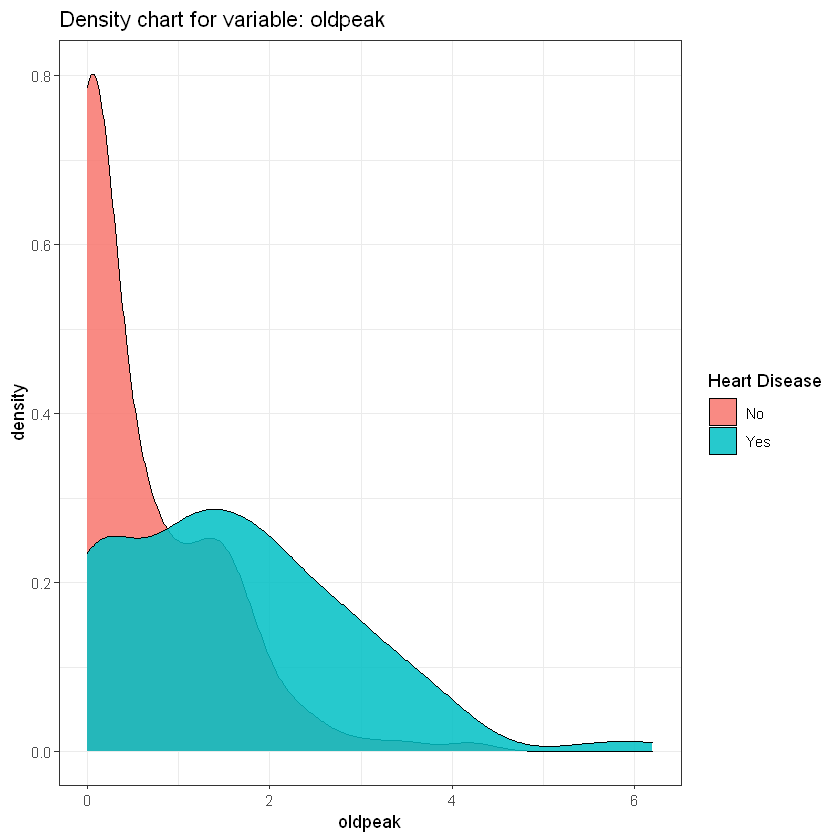

In [168]:
# Definindo o nome da variável a ser analisada.

col <- 'oldpeak'

# Criando um gráfico de densidade para a variável especificada.

densityPlot(col, data)

Podemos ver uma clara diferença entre a distribuição desta medida de anormalidade nos eletrocardiogramas entre o conjunto de indivíduos sadios e os doentes.

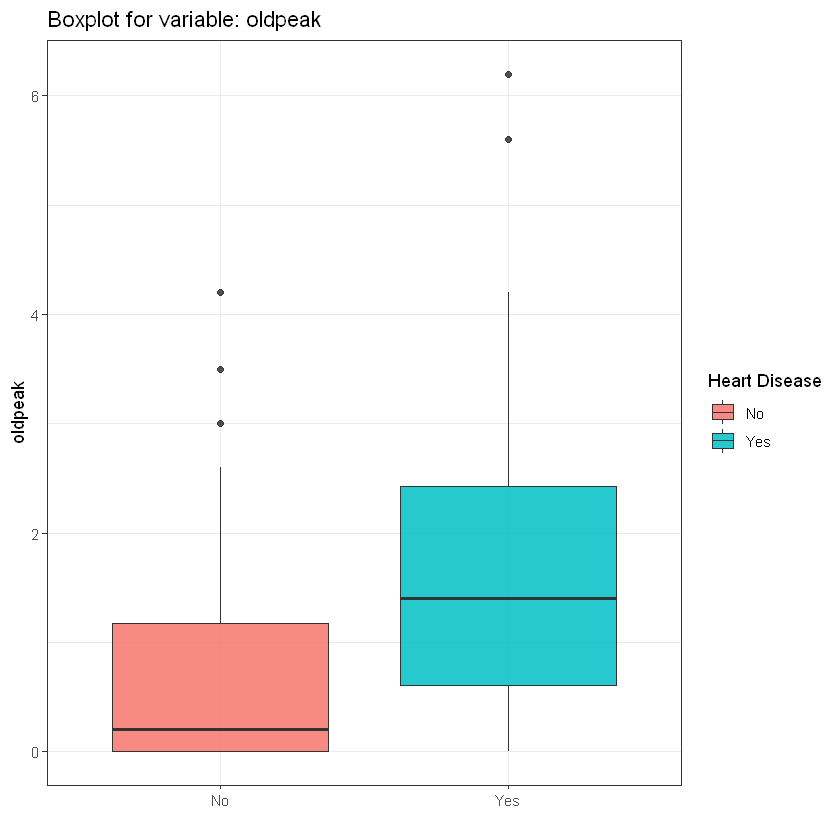

In [169]:
# Criando um gráfico de boxplot para a variável especificada.

boxPlot(col, data)

Descobrimos a existência de outliers dentro dos conjuntos.

Note que esta medida de anormalidade tende a se concentrar próximo de um valor quando analisamos o conjunto de indivíduos saudáveis.

Quanto estudamos o conjunto de dados de pessoas doentes vemos que esta medida tende a variar muito mais.

In [170]:
# Calculando algumas estatísticas para a variável especificada.

varStats(col, data)

heart_disease,Min,Q1,Median,mean,Q3,Max,Sd,Sk,Ck
No,0,0.0,0.2,0.6226667,1.175,4.2,0.8008508,1.5252325,2.6036596
Yes,0,0.6,1.4,1.5841667,2.425,6.2,1.2820674,0.7569866,0.5796318


Concluímos destacando a diferença entre os valores medianos dos conjuntos e os altos índices de *Assimetria* e *Curtose* do grupo de indivíduos sem doenças. 

#### **3.4.12 Variável slope_of_the_peak**

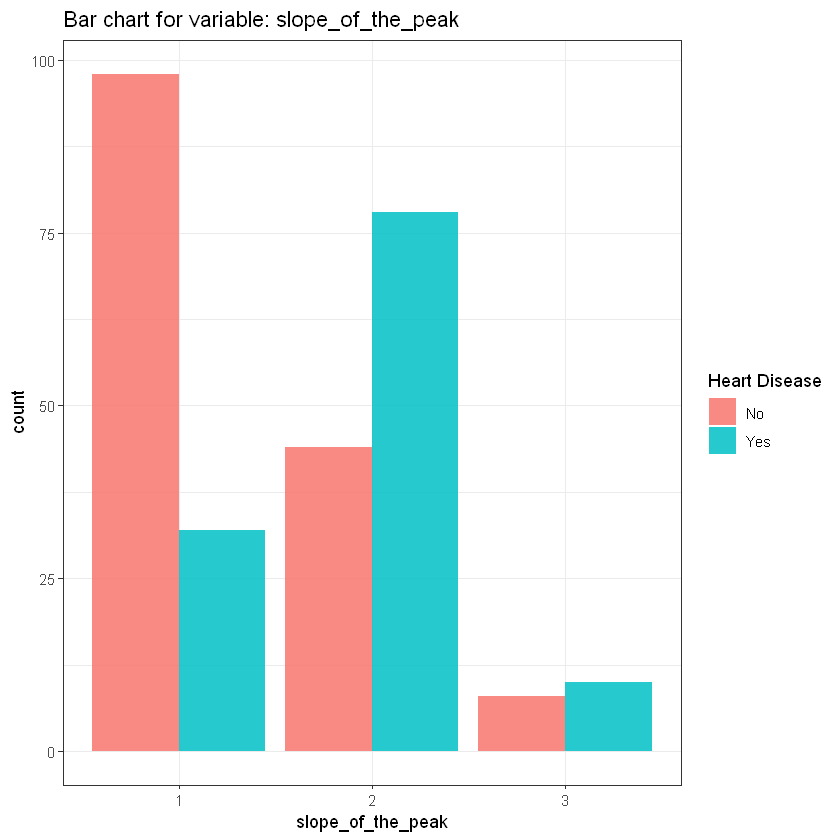

In [171]:
# Definindo o nome da variável a ser analisada.

col <- 'slope_of_the_peak'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

Bom, o gráfico nos indica que a inclinação do *segmento ST* do pico do exercício e predominantemente **1** quando o indivíduo é sadio e **2 ou 3** quando apresenta alguma doença.

In [172]:
# Calculando algumas estatísticas para a variável especificada.

stats <- varStats(col, data)

# Verificando a distribuição de registros entre as classes da variável.

stats$variableClasses

slope_of_the_peak,count,prop
1,130,48.148148
2,122,45.185185
3,18,6.666667


A maior parte dos registros apresentam uma inclinação do *segmento ST* do pico do exercício com valor **1 ou 2**.

In [173]:
# Verificando a distribuição de registros entre as classes da variável especificada agrupadas pela variável alvo.

stats$variableClassesGroupedByTargetVariable

slope_of_the_peak,heart_disease,count,prop
1,No,98,36.296296
1,Yes,32,11.851852
2,No,44,16.296296
2,Yes,78,28.888889
3,No,8,2.962963
3,Yes,10,3.703704


#### **3.4.13 Variável number_of_major_vessels**

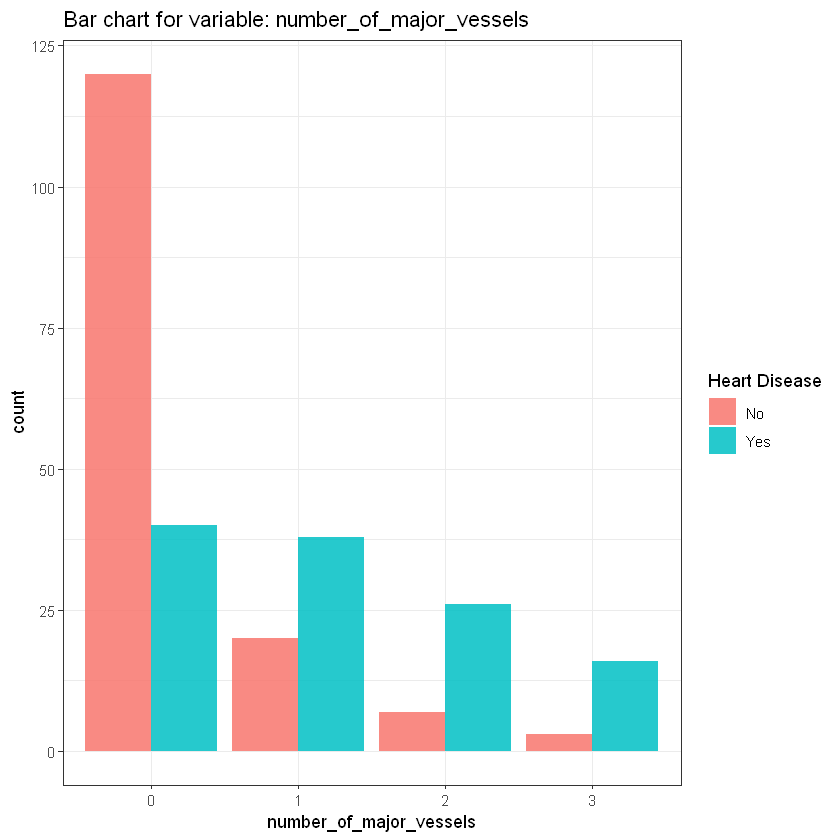

In [174]:
# Definindo o nome da variável a ser analisada.

col <- 'number_of_major_vessels'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

O gráfico gerado por está variável é bem interessante! Veja que a medida que o número de vasos principais coloridos por *flourosopy* aumenta, a proporção de indivíduos saudáveis diminuiu drasticamente.

Vemos isso ao analisar a **coluna 0** e a **coluna 1**. Quando não há vasos principais coloridos por *flourosopy* o conjunto de dados é predominantemente de indivíduos sem doenças. Mas, basta que um vaso seja colorido para que essa predominância mude e os indivíduos com doenças passem a se destacar. 

In [175]:
# Calculando algumas estatísticas para a variável especificada.

stats <- varStats(col, data)

# Verificando a distribuição de registros entre as classes da variável.

stats$variableClasses

number_of_major_vessels,count,prop
0,160,59.259259
1,58,21.481481
2,33,12.222222
3,19,7.037037


Temos em aproximadamente **59.26%** dos registros indivíduos que **não possuem vasos coloridos por flourosopy**.

In [176]:
# Verificando a distribuição de registros entre as classes da variável especificada agrupadas pela variável alvo.

stats$variableClassesGroupedByTargetVariable

number_of_major_vessels,heart_disease,count,prop
0,No,120,44.444444
0,Yes,40,14.814815
1,No,20,7.407407
1,Yes,38,14.074074
2,No,7,2.592593
2,Yes,26,9.629630
3,No,3,1.111111
3,Yes,16,5.925926


Veja atentamente está tabela! 

Quando o número de vasos principais coloridos por *flourosopy* é 0, a proporção de indivíduos sadios é **3 vezes maior** do que a de doentes.

Quando o número de vasos principais coloridos por *flourosopy* é 1, a predominância muda e a proporção de indivíduos doentes se torna **2 vezes maior** do que a dos sadios.

#### **3.4.14 Variável thal**

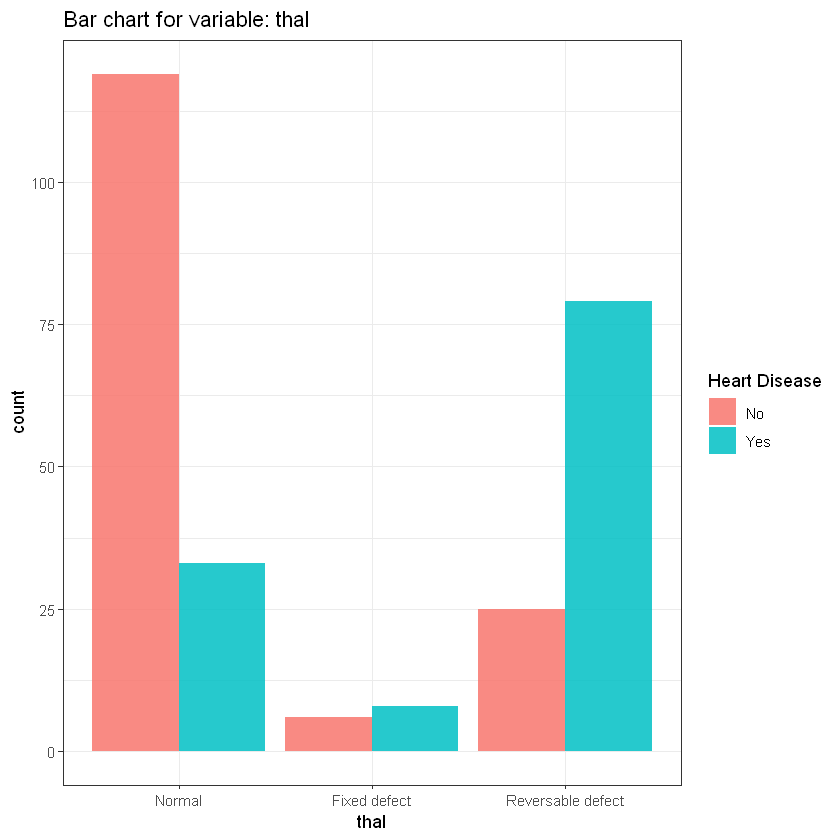

In [177]:
# Definindo o nome da variável a ser analisada.

col <- 'thal'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

Detectamos que predominantemente a maior parte dos indivíduos saudáveis apresenta um resutlado **normal** para o teste de stress com tálio. Porém, quando o resultado é um **defeito fixo** ou um **defeito reversível** a predominância é de indivíduos com problemas cardíacos.

In [178]:
# Calculando algumas estatísticas para a variável especificada.

stats <- varStats(col, data)

# Verificando a distribuição de registros entre as classes da variável.

stats$variableClasses

thal,count,prop
Normal,152,56.296296
Fixed defect,14,5.185185
Reversable defect,104,38.518519


Cerca de **56.3%** dos registros dos indivíduos apresentou um resultado **normal**.

In [179]:
# Verificando a distribuição de registros entre as classes da variável especificada agrupadas pela variável alvo.

stats$variableClassesGroupedByTargetVariable

thal,heart_disease,count,prop
Normal,No,119,44.074074
Normal,Yes,33,12.222222
Fixed defect,No,6,2.222222
Fixed defect,Yes,8,2.962963
Reversable defect,No,25,9.259259
Reversable defect,Yes,79,29.259259


#### **3.4.15 Variável heart_disease**

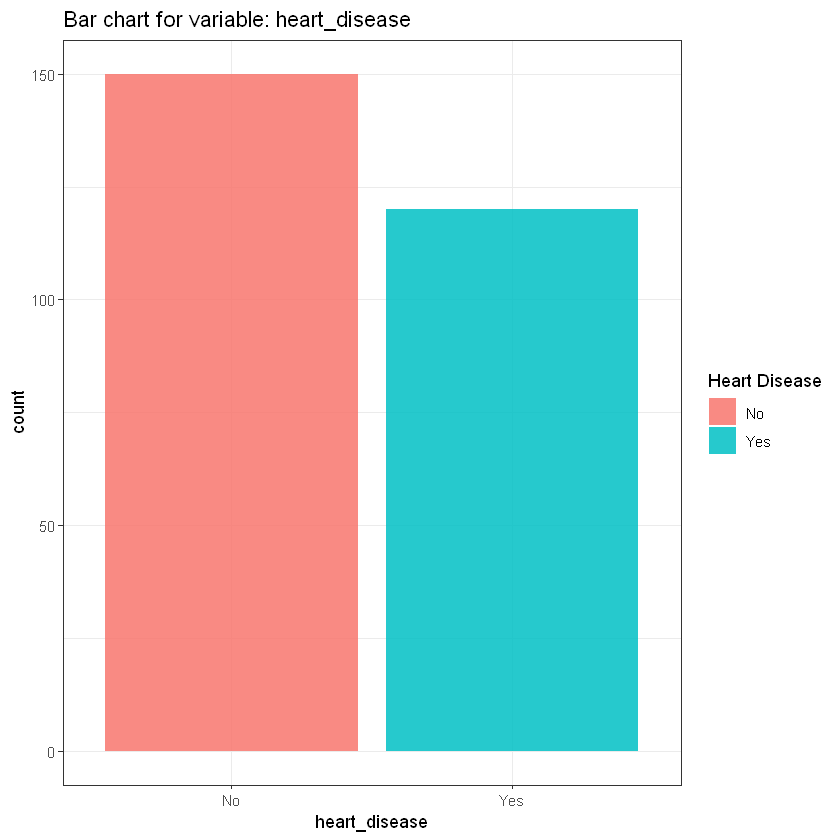

In [180]:
# Definindo o nome da variável a ser analisada.

col <- 'heart_disease'

# Criando um gráfico de barras para a variável especificada.

barPlot(col, data)

Detectamos um desbalanceamento entre as classes da variável preditora.

In [181]:
# Calculando algumas estatísticas para a variável especificada.

stats <- varStats(col, data)

# Verificando a distribuição de registros entre as classes da variável.

stats$variableClasses

heart_disease,count,prop
No,150,55.55556
Yes,120,44.44444


Deveremos tratar este desbalanceamento antes de prosseguir para a análise preditiva.

## **4. Data Munging II - Preparando dados para a modelagem preditiva**

### **4.1 Importando bibliotecas necessárias**

 Importaremos todas as bilbiotecas necessárias para a realização das etapas de modelagem preditiva.

In [ ]:
# Caso não possua uma das bibliotecas importadas abaixo, a instale com o comando a seguir:

install.packages(c(
    'xgboost',
    'MLmetrics',
    'ROSE', 
    'DMwR',
    'caret',
    'randomForest',
    'C50',
    'fastAdaboost'
))

In [183]:
# Importando bibliotecas.

library(xgboost)
library(MLmetrics)
library(caret)
library(randomForest)
library(C50)
library(fastAdaboost)
library(ROSE)
library(DMwR)

### **4.2 Preparando dados para modelagem preditiva**

Muito bem, como a maior parte dos algoritmos de *Machine Learning* trabalham melhor com variáveis númericas, iremos criar uma nova cópia do conjunto de dados sem qualquer uma das modificações que implementamos para executar a fase de exploração de dados. 

In [184]:
# Carregando dataset não modificado.

data <- dataset

Como estamos trabalhando com um problema de classificação, converteremos a variável a ser prevista para o tipo *factor*. Caso algum algoritmo solicite um ajuste específico para manipular o conjunto de dados, faremos a modificação de forma temporária para gerar o modelo em questão e não alterar as variáveis do dataset. 

In [185]:
# Convertendo a variável a ser prevista para o tipo factor.

data$heart_disease <- as.factor(data$heart_disease)

Vamos balancear o número de registros em cada uma das classes da variável alvo. Isso é necessário para evitarmos que o modelo aprenda a identificar corretamente mais uma classe do que outra.

In [186]:
# Definindo um seed para permitir que o balanceamento sempre gere o mesmo resultado e possa ser reproduzível.

set.seed(100)

# Aplicando a técnica SMOTE para balancear o número de registros pertencentes a cada classe da variável alvo.

data <- SMOTE(heart_disease ~., data = data, perc.over = 200, k = 5, perc.under = 155)

In [187]:
# Verificando a proporção de registros em cada uma das classes da variável alvo.

prop.table(table(data$heart_disease))


        1         2 
0.5081967 0.4918033 

Perfeito! Temos aproximadamente 50% de registros em cada uma das classes da variável a ser prevista.

A próxima etapa que iremos efetuar é a escalar os valores das variáveis preditoras entre 0 e 1.

In [188]:
# Definindo método de pré-processamento.

params <- preProcess(data %>% select(- heart_disease), method = 'range')

# Transformando os dados.

data <- predict(params, data)

# Visualizando as primeiras linhas do dataset.

head(data)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electro_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_of_the_peak,number_of_major_vessels,thal,heart_disease
136,0.2790698,0,0.6666667,0.4528302,0.1164384,0,1,0.7177419,1,0.2258065,1.0,0,0,1
78,0.1162791,0,0.6666667,0.0000000,0.1666667,0,0,0.8709677,0,0.0000000,0.0,0,0,1
63,0.2325581,1,0.6666667,0.2452830,0.2283105,0,0,0.7903226,0,0.0000000,0.0,0,0,1
261,0.5581395,0,0.6666667,0.2452830,0.4885845,0,0,0.8145161,0,0.0000000,0.0,0,0,1
84,0.1627907,1,0.6666667,0.3396226,0.2009132,0,1,0.7822581,0,0.3225806,0.5,0,0,1
139,0.0000000,0,0.3333333,0.2264151,0.1917808,0,0,0.9758065,0,0.1129032,0.0,0,0,1


## **5. Modelagem Preditiva**

### **5.1 Criando dados de treino e de teste**

Para iniciar a modelagem preditiva, devemos criar os dados de treino e de teste.

In [189]:
# Definindo um seed.

set.seed(100)

# Criando as partições com dados de treino e de teste.

inTrain <- createDataPartition(data$heart_disease, p = .80, list = F)

# Segmentando dados de treino e de teste por partição.

train <- data[inTrain, ]
test  <- data[-inTrain, ]

### **5.2 Avaliando a importância das variáveis com o algoritmo Random Forest**

Antes de iniciarmos a criação dos modelos propriamente dita, é interessante definirmos o quanto cada variável dentro do dataset ajuda a prever o valor da variável *target*.

Para fazermos isto, utilizaremos o algoritmo **Random Forest** para computar tais valores. Como não sabemos qual o ajuste de parâmetros do algoritmo é mais adequado para o nosso conjunto de dados, criaremos modelos que possuam de 1 a 100 árvores com 1 a 100 nós.

Salvaremos a acurárica de cada modelo em um Dataframe. Note que por ser um processo de treinamento que tende a demandar muito tempo para ser processado, salvaremos os resultados obtidos em um arquivo CSV que pode ser carregado com todos os resultados gerados pelo bloco de código a seguir. 

In [ ]:
# Criando o dataframe para salvar os resultados dos modelos.

featuresRF <- data.frame()

# Definindo o número de nós e árvores a serem combinados para a criação de diferentes modelos.

nTrees <- 1:100
nNodes <- 1:100

# Define o número total de modelos a serem criados.

total <- length(nTrees) * length(nNodes)

# Define uma varíavel auxiliar para permitir o acompanhamento do progresso na avaliação dos modelos criados.

count <- 0

for(t in nTrees) {
    
  for(n in nNodes) {
    
    # Define um seed para permitir que os mesmos resultados dos experimentos sejam reproduzíveis.
    
    set.seed(100)
    
    # Cria o modelo Random Forest a ser avaliado.

    model <- randomForest(heart_disease ~ .,
                          data       = train, 
                          ntree      = t, 
                          nodesize   = n, 
                          importance = T)
    
    # Computa a Confusion Matrix gerada a partir do modelo criado.

    cm <- confusionMatrix(table(
        data      = model$y, 
        reference = model$predicted
    ))
    
    # Armazena os parâmetros utilizados para criação do modelo e a acurácia obtida no dataframe.

    featuresRF <- rbind(featuresRF, data.frame(
        nodes    = n, 
        nTree    = t, 
        accuracy = unname(cm$overall['Accuracy'])
    ))
    
    # Incrementa o número de modelos avaliados.

    count <- count + 1

    # Imprime a porcetagem de progresso do treinamento e a melhor acurácia já alcançada.

    print(paste(100 * count / total, '%, best accuracy: ', max(featuresRF$accuracy)))
  }
}

# Salvando dataframe com os resultados gerados em um arquivo .csv.

write.csv(featuresRF, 'content/outputs/featuresRF.csv')

Caso deseje pular a execução do bloco de código anterior, basta carregar os resultados já processados que estão salvos no arquivo CSV abaixo:

In [191]:
# Carregando dataframe com os resultados obtidos para cada modelo Random Forest criado.

featuresRF <- read.csv('content/outputs/featuresRF.csv')

Imprimiremos os registros dos modelos que apresentaram a melhor acurácia.

In [192]:
# Imprimindo registros dos modelos que alcançaram a maior acurácia.

bestRF <- featuresRF[featuresRF$accuracy == max(featuresRF$accuracy), ]

bestRF 

,X,nodes,nTree,accuracy
5101,5101,1,52,0.9658703


Caso mais de um modelo apresente a maior acurácia registrada dentro do dataset, selecionaremos o primeiro que foi listado para ser utilizado nas etapas seguintes.

In [193]:
# Selecionando o primeiro registro dentro do dataframe.

bestRF <- bestRF[1,]

Recriaremos este modelo e imprimiremos suas estatísticas.

In [194]:
# Define um seed para permitir que o mesmo resultado do experimento seja reproduzível.

set.seed(100)

# Criando modelo.

model <- randomForest(heart_disease ~ .,
                      data       = train, 
                      ntree      = bestRF[, 'nTree'], 
                      nodesize   = bestRF[, 'nodes'], 
                      importance = T
         )
                      
# Imprimindo o modelo.

model


Call:
 randomForest(formula = heart_disease ~ ., data = train, ntree = bestRF[,      "nTree"], nodesize = bestRF[, "nodes"], importance = T) 
               Type of random forest: classification
                     Number of trees: 52
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.41%
Confusion matrix:
    1   2 class.error
1 293   5  0.01677852
2  15 273  0.05208333

Agora podemos plotar o modelo em um gráfico e verificar o nível de importância das variáveis do dataset para prever a variável alvo.

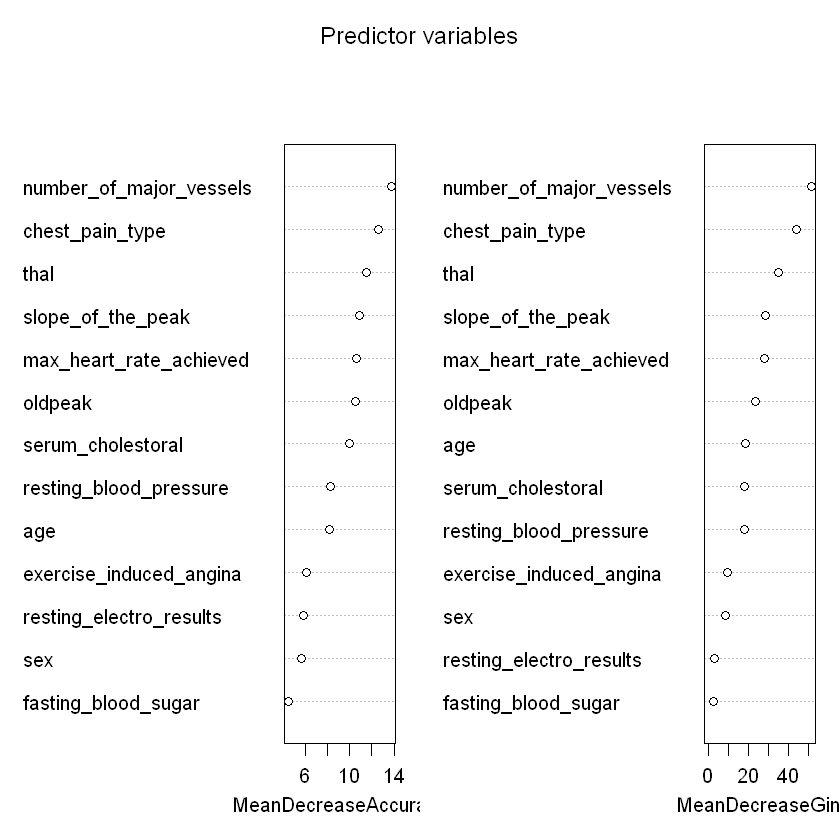

In [195]:
# Plotando gráfico para visualizar o nível de importância de cada variável no processo de predição da variável alvo.

v <- as.data.frame(varImpPlot(model, main = 'Predictor variables'))

### **5.3 Feature Selection**

Bom, vamos considerar a medida **MeanDecreaseAccuracy** calculada na fase anterior. Sabemos que as variáveis mais importantes para prever a variável alvo são aquelas que apresentam os maiores valores para esta grandeza.

Sendo assim, iremos eliminar as 3 variáveis preditoras com os menores valores de importância. Como o gráfico anterior nos mostra, são elas: **sex**, **resting_electro_results**, **fasting_blood_sugar**.

In [196]:
# Definindo um vetor com o nome das variáveis que devem ser desconsideras pelo modelo a ser treinado.

d <- c('sex', 'resting_electro_results', 'fasting_blood_sugar', 'heart_disease')

# Definindo fórmula a ser utilizada pelo modelo a ser treinado.

f <- heart_disease ~ . - sex - resting_electro_results - fasting_blood_sugar

### **5.4 Criando modelos**

#### **5.4.1 Modelo Random Forest**

In [197]:
# Define um seed para permitir que o mesmo resultado do experimento seja reproduzível.

set.seed(100)

# Criando modelo.

model_rf <- randomForest(heart_disease ~ .,
                      data       = train, 
                      ntree      = bestRF[, 'nTree'], 
                      nodesize   = bestRF[, 'nodes']
         )
                      
# Imprimindo o modelo.

model_rf


Call:
 randomForest(formula = heart_disease ~ ., data = train, ntree = bestRF[,      "nTree"], nodesize = bestRF[, "nodes"]) 
               Type of random forest: classification
                     Number of trees: 52
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.44%
Confusion matrix:
    1   2 class.error
1 291   7  0.02348993
2  19 269  0.06597222

In [198]:
# Realizando as previsões com o modelo baseado no algoritmo Random Forest.

pred <- predict(model_rf, test)

In [199]:
# Criando a Confusion Matrix a partir das previsões.  

cm <- confusionMatrix(table(pred = pred, data = test$heart_disease))

# Visualizando a Confusion Matrix.

cm

Confusion Matrix and Statistics

    data
pred  1  2
   1 73  9
   2  1 63
                                          
               Accuracy : 0.9315          
                 95% CI : (0.8776, 0.9667)
    No Information Rate : 0.5068          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8628          
                                          
 Mcnemar's Test P-Value : 0.02686         
                                          
            Sensitivity : 0.9865          
            Specificity : 0.8750          
         Pos Pred Value : 0.8902          
         Neg Pred Value : 0.9844          
             Prevalence : 0.5068          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5616          
      Balanced Accuracy : 0.9307          
                                          
       'Positive' Class : 1               
                                          

In [200]:
# Calculando o valor da métrica Logloss para o modelo.

logloss <- LogLoss(as.numeric(pred), as.numeric(test$heart_disease))

# Exibe o valor da métrica.

logloss

[1] -17.03322

Perfeito, nosso primeiro modelo foi criado! Vamos salvar os scores de sua *acurácia* e de sua métrica *Logloss* em um dataframe.

In [201]:
# Salvando scores das métricas analisadas em um dataframe.

scoreModels <- data.frame(accuracy = unname(cm$overall['Accuracy']), logloss = logloss, row.names = 'randomForest')

#### **5.4.2 Modelo C 5.0**

In [202]:
# Definindo a matriz de custos a ser utilizada pelo modelo.

cost <- matrix(c(0, 0.5, 0.5, 0), nrow = 2, dimnames = list(c("No", "Yes"), c("No", "Yes")))

# Visualizando a matriz.

cost

,No,Yes
No,0.0,0.5
Yes,0.5,0.0


In [203]:
# Criando o modelo baseado no algoritmo C 5.0.

model_c50 <-  C5.0(f, data = train, trials = 100, cost = cost)

In [204]:
# Realizando as previsões com o modelo baseado no algoritmo C 5.0.

pred <- predict(model_c50, test)

In [205]:
# Criando a Confusion Matrix a partir das previsões.  

cm <- confusionMatrix(table(pred = pred, data = test$heart_disease))

# Visualizando a Confusion Matrix.

cm

Confusion Matrix and Statistics

    data
pred  1  2
   1 73  6
   2  1 66
                                          
               Accuracy : 0.9521          
                 95% CI : (0.9037, 0.9805)
    No Information Rate : 0.5068          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.904           
                                          
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.9865          
            Specificity : 0.9167          
         Pos Pred Value : 0.9241          
         Neg Pred Value : 0.9851          
             Prevalence : 0.5068          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5411          
      Balanced Accuracy : 0.9516          
                                          
       'Positive' Class : 1               
                                          

In [206]:
# Calculando o valor da métrica LogLoss para o modelo.

logloss <- LogLoss(as.numeric(pred), as.numeric(test$heart_disease))

# Exibe o valor da métrica.

logloss

[1] -17.03322

In [207]:
# Salvando scores das métricas analisadas em um dataframe.

scoreModels <- rbind(scoreModels, data.frame(accuracy = unname(cm$overall['Accuracy']), logloss = logloss, row.names = 'C5.0'))

#### **5.4.3 Modelo Adaboost**

In [208]:
# Criando o modelo baseado no algoritmo Adaboost.

model_adaboost <-  adaboost(formula = f, data = train, nIter = 21)

In [209]:
# Realizando as previsões com o modelo baseado no algoritmo Adaboost.

pred <- predict(model_adaboost, test, type = 'class')

In [210]:
# Criando a Confusion Matrix a partir das previsões.  

cm <- confusionMatrix(table(pred = pred$class, data = test$heart_disease))

# Visualizando a Confusion Matrix.

cm

Confusion Matrix and Statistics

    data
pred  1  2
   1 74  5
   2  0 67
                                          
               Accuracy : 0.9658          
                 95% CI : (0.9219, 0.9888)
    No Information Rate : 0.5068          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9314          
                                          
 Mcnemar's Test P-Value : 0.07364         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9306          
         Pos Pred Value : 0.9367          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5068          
         Detection Rate : 0.5068          
   Detection Prevalence : 0.5411          
      Balanced Accuracy : 0.9653          
                                          
       'Positive' Class : 1               
                                          

In [211]:
# Calculando o valor da métrica LogLoss para o modelo.

logloss <- LogLoss(as.numeric(pred$class), as.numeric(test$heart_disease))

# Exibe o valor da métrica.

logloss

[1] -17.03322

In [212]:
# Salvando scores das métricas analisadas em um dataframe.

scoreModels <- rbind(scoreModels, data.frame(accuracy = unname(cm$overall['Accuracy']), logloss = logloss, row.names = 'adaboost'))

#### **5.4.4 Modelo XGboost**

In [213]:
# Criando o modelo baseado no algoritmo XGboost.

  model_xgboost <- xgboost(
      data      = as.matrix(train %>% select(-d)) ,               # Define as variáveis preditoras.
      label     = as.matrix(as.integer(train$heart_disease) - 1), # Define a variável target.
      max.depth = 20,                                             # Define o tamanho máximo da árvore.
      eta       = 1,                                              # Define a taxa de aprendizado do modelo.
      nthread   = 4,                                              # Define o número de threads que devem ser usadas. Quanto maior for esse número, mais rápido será o treinamento.
      nrounds   = 15,                                             # Define o número de iterações.
      objective = "binary:logistic",                              # Define que o modelo deve ser baseado em uma regressão logistica binária.
      verbose   = T,                                              # Define a exibição da queda da taxa de erro durante o treinamento.
      eval_metric = 'logloss'                                     # Define a função de avaliação a ser utilizada.
)

[1]	train-logloss:0.246064 
[2]	train-logloss:0.130332 
[3]	train-logloss:0.087831 
[4]	train-logloss:0.064753 
[5]	train-logloss:0.051350 
[6]	train-logloss:0.042103 
[7]	train-logloss:0.036274 
[8]	train-logloss:0.030612 
[9]	train-logloss:0.027692 
[10]	train-logloss:0.024471 
[11]	train-logloss:0.022729 
[12]	train-logloss:0.021313 
[13]	train-logloss:0.020104 
[14]	train-logloss:0.018320 
[15]	train-logloss:0.016963 


In [214]:
# Realizando as previsões com o modelo baseado no algoritmo XGboost.

pred <- predict(model_xgboost, as.matrix(test %>% select(-d)))

In [215]:
# Definindo o threshold.

th <- 0.5

# Classificando os resultados segundo o threshold especificado.

predClass <- ifelse(pred > th, 1, 0)

In [216]:
# Criando a Confusion Matrix a partir das previsões.  

cm <- confusionMatrix(table(pred = predClass, data = as.matrix(as.integer(test$heart_disease) - 1)))

# Visualizando a Confusion Matrix.

cm

Confusion Matrix and Statistics

    data
pred  0  1
   0 74  5
   1  0 67
                                          
               Accuracy : 0.9658          
                 95% CI : (0.9219, 0.9888)
    No Information Rate : 0.5068          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9314          
                                          
 Mcnemar's Test P-Value : 0.07364         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9306          
         Pos Pred Value : 0.9367          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5068          
         Detection Rate : 0.5068          
   Detection Prevalence : 0.5411          
      Balanced Accuracy : 0.9653          
                                          
       'Positive' Class : 0               
                                          

In [217]:
# Calculando o valor da métrica LogLoss para o modelo.

logloss <- LogLoss(as.numeric(pred), as.matrix(as.integer(test$heart_disease) - 1))

# Exibe o valor da métrica.

logloss

[1] 0.1838556

In [218]:
# Salvando scores das métricas analisadas em um dataframe.

scoreModels <- rbind(scoreModels, data.frame(accuracy = unname(cm$overall['Accuracy']), logloss = logloss, row.names = 'XGboost'))

#### **5.4.5 Determinando o melhor modelo**

Determinaremos qual modelo teve o melhor desempenho para o conjunto de dados de treino a partir do score da métrica **LogLoss** e da **acurácia** gerados por cada um.

In [219]:
# Exibindo dataframe com as métricas de performance dos modelos treinados.

scoreModels

,accuracy,logloss
randomForest,0.9315068,-17.0332156
C5.0,0.9520548,-17.0332156
adaboost,0.9657534,-17.0332156
XGboost,0.9657534,0.1838556


In [220]:
# Determinando o modelo que teve o maior score para a acurácia e o menor score para a métrica LogLoss.

scoreModels[scoreModels$accuracy == max(scoreModels$accuracy) & scoreModels$logloss == min(scoreModels$logloss), ]

,accuracy,logloss
adaboost,0.9657534,-17.03322


Por fim, concluímos que o algoritmo que obteve a melhor performance para os critérios que adotamos foi o **Adaboost**.

# **Entre em contato comigo!**

Caso tenha alguma dúvida, sugestão ou apenas queira trocar uma ideia sobre este projeto, não hesite em entrar em contato comigo!

<table align='center'>
    <tr style=" background-color: rgba(0,0,0,0);">
        <td>
            <img src="https://image.flaticon.com/icons/svg/732/732026.svg" alt="Email" height="42" width="42">
        </td>
        <td>
            <p>
                <a href="mailto:franklinfs390@gmail.com">E-mail</href>
            </p>
        </td>
    <td>
            <img src="https://image.flaticon.com/icons/svg/254/254394.svg" alt="Linkedin" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://www.linkedin.com/in/franklinfs390/">Linkedin</href>
        </p>
    </td>
    <td>
        <img src="https://image.flaticon.com/icons/svg/2111/2111432.svg" alt="Github" height="42" width="42">
    </td>
    <td>
        <p>
            <a href="https://github.com/franklin390">Github</href>
        </p>
    </td>
  </tr>
</table>
